### This notebook contains the code of importing the CSVs and analysing and exploring those CSVs


#### **1. Importing the necessary library**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **2. Reading the CSVs**


In [2]:
books = pd.read_csv("../csv/Books.csv")
ratings = pd.read_csv("../csv/Ratings.csv")
users = pd.read_csv("../csv/Users.csv")

/tmp/ipykernel_6599/3481342693.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("../csv/Books.csv")


#### **3. Exploring the data like its value and shape ...**


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [22]:
# Grouping by 'Year-Of-Publication' and counting the number of books per year
books_per_year = books["Year-Of-Publication"].value_counts()

# Working on the books year

In [23]:
books1=books

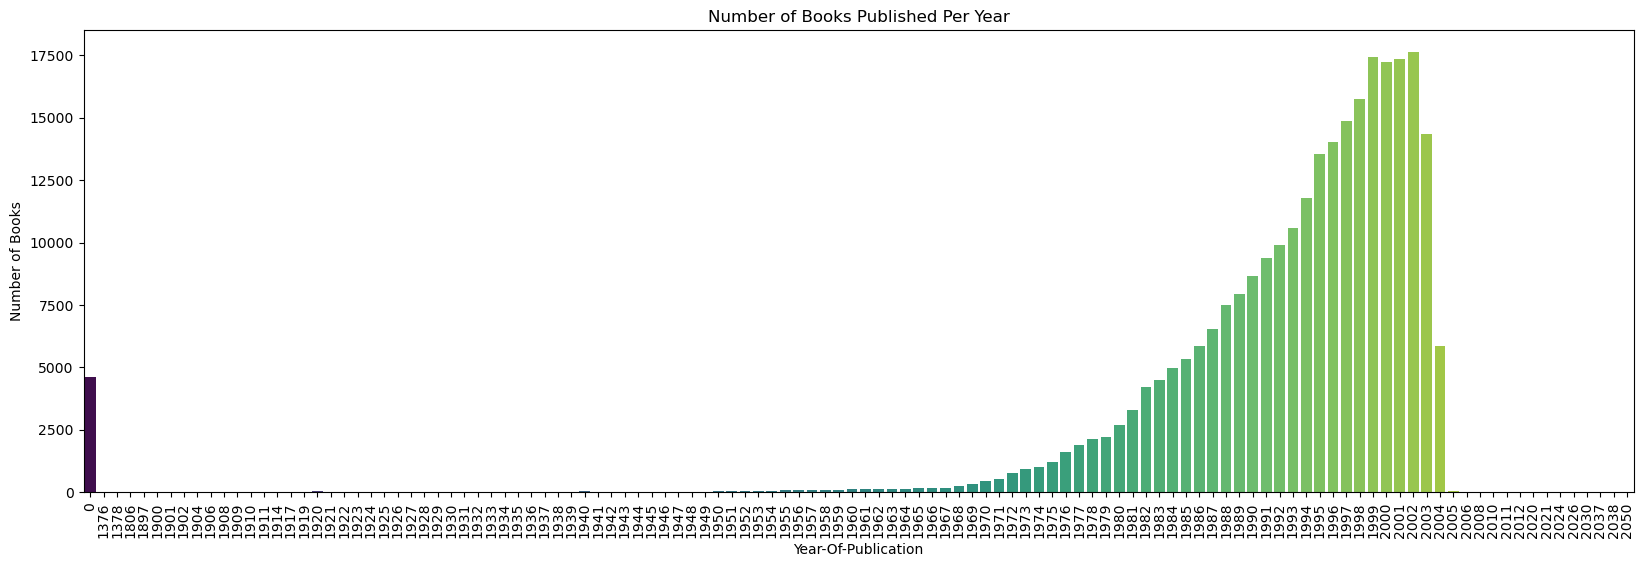

In [40]:
# Assuming your data is already loaded into the 'books' dataframe
# books = pd.read_csv('your_file.csv') # If you are loading from a CSV file

# Convert 'Year-Of-Publication' to numeric, forcing errors to NaN
books1["Year-Of-Publication"] = pd.to_numeric(
    books1["Year-Of-Publication"], errors="coerce"
)

# Drop rows with NaN in 'Year-Of-Publication'
books1 = books1.dropna(subset=["Year-Of-Publication"])

# Convert 'Year-Of-Publication' to integers
books1["Year-Of-Publication"] = books1["Year-Of-Publication"].astype(int)

# Grouping by 'Year-Of-Publication' and counting the number of books per year
books_per_year = books1["Year-Of-Publication"].value_counts().sort_index()

# Creating the bar plot
plt.figure(figsize=(20, 6))
sns.barplot(
    x=books_per_year.index, y=books_per_year.values, palette="viridis", width=0.8)
plt.title("Number of Books Published Per Year")
# plt.xlabel("Year")
plt.xticks(rotation=90)  # Rotate x-axis labels to be vertical
plt.ylabel("Number of Books")
plt.show()

In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
books_count_yearwise = books.groupby("Year-Of-Publication").count()

In [7]:
books_count_yearwise

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
Year-Of-Publication,,,,,,,
0,3570,3570,3570,3570,3570,3570,3570
1806,1,1,1,1,1,1,1
1900,1,1,1,1,1,1,1
1901,7,7,7,7,7,7,7
1902,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
2024,1,1,1,1,1,1,1
2030,3,3,3,3,3,3,3
2037,1,1,1,1,1,1,1


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print(
    f"Shape of the dataframe is as follows\nbooks: {books.shape}\nusers: {users.shape}\nratings: {ratings.shape}"
)

Shape of the dataframe is as follows
books: (271360, 8)
users: (278858, 3)
ratings: (1149780, 3)


##### Finding the number of missing values in any column of a dataframe


In [7]:
# number of missing values in any column
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [9]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

##### Finding the duplicated values


In [10]:
books.duplicated().sum()

0

In [11]:
users.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

0

In [15]:
# ratings["User-ID"].duplicated().sum()
duplicated_user_id_rating = ratings[ratings.duplicated("User-ID", keep=False)]
print(duplicated_user_id_rating)

         User-ID        ISBN  Book-Rating
3         276729  052165615X            3
4         276729  0521795028            6
10        276746  0425115801            0
11        276746  0449006522            0
12        276746  0553561618            0
...          ...         ...          ...
1149771   276704  0743211383            7
1149772   276704  080410526X            0
1149773   276704  0806917695            5
1149774   276704  0876044011            0
1149775   276704  1563526298            9

[1090614 rows x 3 columns]


In [14]:
# Sample data
data = {"user_id": [1, 2, 3, 1, 4, 5, 2], "value": ["a", "b", "c", "d", "e", "f", "g"]}

# Create DataFrame
df_test = pd.DataFrame(data)

# Identify duplicated user_ids
duplicated_user_ids = df_test[df_test.duplicated("user_id", keep=False)]

print("Rows where the same user_id is used in multiple rows:")
print(duplicated_user_ids)

Rows where the same user_id is used in multiple rows:
   user_id value
0        1     a
1        2     b
3        1     d
6        2     g
